In [17]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import scipy
import scipy.optimize as optimize

In [63]:
def obs_vel_map(xx, r_max, r_t, v_t, incl, Psi_0, v_sys):

    npix=160
    yy = xx.transpose()
    # central position of the array
    xc,yc = npix/2 -0.5, npix/2 -0.5
    # R and Psi matrix
    R = np.sqrt((xx-xc)**2 + (yy-yc)**2)
    Psi = np.arctan((yy-yc)/(xx-xc))
    Psi = np.rad2deg(Psi) + 90
    Psi[int(npix/2):,:] = Psi[int(npix/2):,:]+180
    # alpha and r matrix            
    alpha = np.sqrt(np.cos((Psi-Psi_0)*np.pi/180)**2 + (np.sin((Psi-Psi_0)*np.pi/180)**2)/np.cos(incl*np.pi/180)**2)
    r = R*alpha  # Real radius in galaxy in pixels calculated from the projection of them
                
    v_cir = -v_t*np.e**(-r/r_t)+v_t  
    #v_cir[v_cir > -v_t*np.e**(-r_max/r_t)+v_t ] = 'nan'     # If you want that outside the galaxy the matrix has nan values  
          

    v_los = v_sys + (v_cir/alpha)*np.sin(incl*np.pi/180)*np.cos((Psi-Psi_0)*np.pi/180)
             
    return v_los.ravel()

In [64]:
x = np.arange(160) #number of rows of data
y = np.arange(160) #number of columns of data
yy,xx = np.meshgrid(x,y)
v_prueba=obs_vel_map(xx,40, 5, 100, -90, 200, -10)

[ 60.           5.         100.00012539  19.72222376 276.14056246
  -3.36068848]


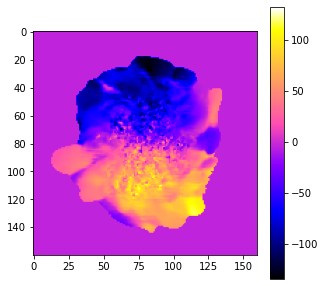

In [65]:
v = np.loadtxt("velmap.txt")
v_max = np.nanmax(v)
v_min = np.nanmin(v)
v[np.isnan(v)]= np.nanmean(v)   #nan values are changed for the mean value of the matrix

x = np.arange(160) #number of rows of data
y = np.arange(160) #number of columns of data
yy,xx = np.meshgrid(x,y)

fig = plt.figure(figsize=(5, 5))
plt.imshow(v,cmap="gnuplot2")
plt.colorbar()


popt,pconv = optimize.curve_fit(obs_vel_map, xx, v.ravel(), bounds = ([40, 5, 100, -90, 200, -10], [80, 80, 500, 90, 360, 5]), method = 'trf') 
print(popt) 

ydata - f(xdata, params)
popt = optimize.leastsq(v.ravel()-obs_vel_map(xx,), bounds = ([40, 5, 100, -90, 200, -10], [80, 80, 500, 90, 360, 5]), method = 'trf') 
print(popt)

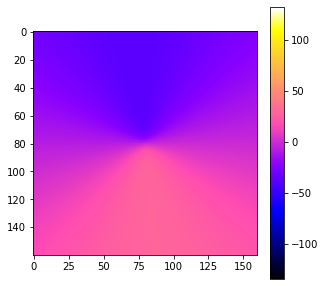

In [92]:
fig = plt.figure(figsize=(5, 5))
vel_obs=obs_vel_map(xx, *popt).reshape(160, 160)
plt.imshow(vel_obs,cmap="gnuplot2", vmax = v_max, vmin = v_min )
plt.colorbar()

In [93]:
v = np.loadtxt("velmap.txt")
mask = np.where(v == np.nan, v, v*0 +1)

In [94]:
print(mask)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


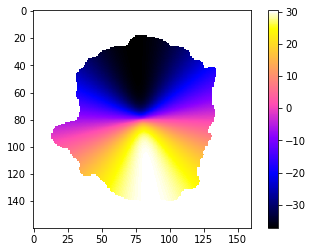

In [95]:
vel_final = mask*vel_obs
plt.imshow(vel_final,cmap="gnuplot2" )
plt.colorbar()

In [36]:
def obs_vel_map(xx, r_max, r_t, v_t, incl, Psi_0, v_sys):
    """
    Function to calculate the circular velocity in each radius of the galaxy according 
    to the simplest model of a galaxy's rotation curve (velocity grows linearly at the 
    beginning and then is constant).
    
    Parameters:
    -----------
    y_x : Square matrix
    r_max : Maximum radius of the galaxy (limits)
    r_t : Distance at which the galaxy reaches the maximum speed
    v_t : Maximum speed of the galaxy
    incl :  inclination angle
    Psi_0 : position angle
    v_sys : systemic velocity
    
    Return:
    ----------
    v_los : Matrix of galaxy velocity along the line of sight
    """ 
    #x = np.arange(npix)
    # Array of x,y coordinates, an element for each pixel in the image
    #y = x
    #yy,xx = np.meshgrid(x,y)
    yy = xx.transpose()
    #xx = data[0]
    #yy = data[1]
    npix = yy.shape[0]
    # central position of the array
    xc,yc = npix/2 -0.5, npix/2 -0.5
    # R and Psi matrix
    R = np.sqrt((xx-xc)**2 + (yy-yc)**2)
    Psi = np.arctan((yy-yc)/(xx-xc))
    Psi = np.rad2deg(Psi) + 90
    Psi[int(npix/2):,:] = Psi[int(npix/2):,:]+180
    # alpha and r matrix            
    alpha = np.sqrt(np.cos((Psi-Psi_0)*np.pi/180)**2 + (np.sin((Psi-Psi_0)*np.pi/180)**2)/np.cos(incl*np.pi/180)**2)
    r = R*alpha  # Real radius in galaxy in pixels calculated from the projection of them

    #Conversion factor from pixels to radius
    #pix2r = r_max/(npix/(2*np.cos(Psi_0*np.pi/180)))
    #r = r_pix*pix2r  #Distance in the units of the radius
                
    v_cir = -v_t*np.e**(-r/r_t)+v_t  
    #v_cir[r > r_max] = -0.001#'nan'     # If you want that outside the galaxy the matrix has nan values  
          

    v_los = v_sys + (v_cir/alpha)*np.sin(incl*np.pi/180)*np.cos((Psi-Psi_0)*np.pi/180)
    v_los[r > r_max] =  v_sys #'nan'#v_sys #v_los.max()#'nan'
             
    return v_los.ravel()

[ 60.           9.36626776 246.61477294  18.31393316 276.46496982
  -3.3606886 ]


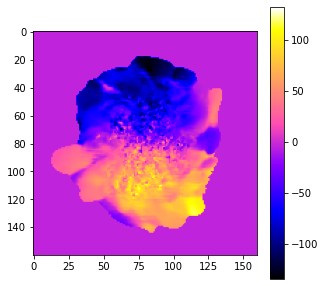

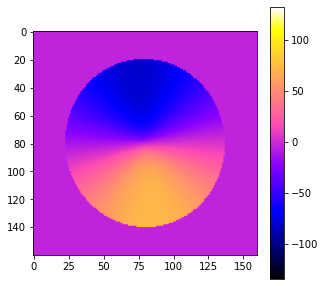

In [37]:
v = np.loadtxt("velmap.txt")
v_max = np.nanmax(v)
v_min = np.nanmin(v)
v[np.isnan(v)]= np.nanmean(v)   #nan values are changed for the mean value of the matrix

x = np.arange(160) #number of rows of data
y = np.arange(160) #number of columns of data
yy,xx = np.meshgrid(x,y)

fig = plt.figure(figsize=(5, 5))
plt.imshow(v,cmap="gnuplot2")
plt.colorbar()


popt,pconv = optimize.curve_fit(obs_vel_map, xx, v.ravel(), bounds = ([40, 5, 100, -90, 200, -10], [80, 80, 500, 90, 360, 5]), method = 'trf') 
print(popt) 

fig = plt.figure(figsize=(5, 5))
v_final=obs_vel_map(xx, *popt)
plt.imshow(v_final.reshape(160, 160),cmap="gnuplot2", vmax = v_max, vmin = v_min )
plt.colorbar()